# Tripadvisor_Hotel Review Dataset

In [14]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [15]:
trip = pd.read_csv(r"D:\denis\tripadvisor_hotel_reviews.csv" )

In [16]:
trip.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [17]:
trip.shape

(20491, 2)

In [18]:
trip.iloc[0][1]

4

In [19]:
from nltk.corpus import stopwords

In [20]:
import wordcloud
from wordcloud import WordCloud

In [21]:
cloud = WordCloud().generate(str(trip['Review']))

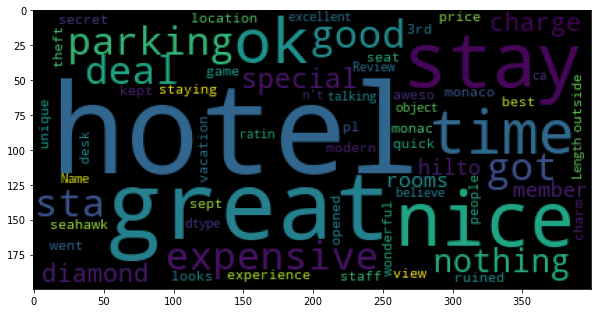

In [22]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

In [23]:
import string 

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def text_process(mess):                ## Create a function
    """                                # A docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [word for word in nopunc.split()if word not in stopwords.words("english")]

In [26]:
trip['Review'].apply(text_process)

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, 4, experience, hotel, monaco, se...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, 3rd, time, staying, charm...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, looks, nice, modern, outside, desk, staff...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, nt, believe, excellent, ...
Name: Review, Length: 20491, dtype: object

In [27]:
from sklearn.feature_extraction.text import CountVectorizer #
bow_transformer = CountVectorizer(analyzer = text_process).fit(trip["Review"])

In [28]:
bow_transformer.vocabulary_

{'nice': 49206,
 'hotel': 36909,
 'expensive': 28378,
 'parking': 53208,
 'got': 33582,
 'good': 33347,
 'deal': 21915,
 'stay': 68556,
 'anniversary': 6999,
 'arrived': 8200,
 'late': 42141,
 'evening': 27588,
 'took': 73466,
 'advice': 5264,
 'previous': 56545,
 'reviews': 61027,
 'valet': 76980,
 'check': 16606,
 'quick': 57945,
 'easy': 25627,
 'little': 43220,
 'disappointed': 23592,
 'nonexistent': 49873,
 'view': 77537,
 'room': 61740,
 'clean': 17592,
 'size': 65815,
 'bed': 11090,
 'comfortable': 18553,
 'woke': 80136,
 'stiff': 68860,
 'neck': 48790,
 'high': 36036,
 'pillows': 54643,
 'soundproof': 67119,
 'like': 42920,
 'heard': 35439,
 'music': 48313,
 'night': 49383,
 'morning': 47723,
 'loud': 43892,
 'bangs': 9939,
 'doors': 24555,
 'opening': 51490,
 'closing': 17921,
 'hear': 35436,
 'people': 53896,
 'talking': 70917,
 'hallway': 34815,
 'maybe': 45647,
 'noisy': 49763,
 'neighbors': 48969,
 'aveda': 9092,
 'bath': 10462,
 'products': 57041,
 'goldfish': 33298,
 'to

In [29]:
len(bow_transformer.vocabulary_)

81408

In [30]:
trip_bow = bow_transformer.transform(trip.Review)

In [31]:
trip_bow.shape

(20491, 81408)

In [32]:
type(trip_bow)

scipy.sparse.csr.csr_matrix

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(trip_bow,trip.Rating,test_size=.3)

## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt=DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [36]:
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)

tab_dt = confusion_matrix(pred_dt,y_test)
tab_dt

array([[ 140,   95,   41,   22,   18],
       [   5,   10,    4,    3,    4],
       [  14,   25,   15,   18,   12],
       [  24,   53,  102,  141,  108],
       [ 241,  362,  476, 1669, 2546]], dtype=int64)

In [37]:
Accuracy = tab_dt.diagonal().sum() / tab_dt.sum()*100
Accuracy

46.38906961613533

## Navive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
naive_bayes = MultinomialNB()

In [40]:
naive_bayes.fit(x_train, y_train)
pred_nb = naive_bayes.predict(x_test)

tab_nb = confusion_matrix(pred_nb,y_test)
tab_nb

array([[  92,   18,    1,    1,    2],
       [ 150,  100,   16,    5,    3],
       [  14,   18,   12,    1,    2],
       [ 139,  332,  472,  819,  377],
       [  29,   77,  137, 1027, 2304]], dtype=int64)

In [41]:
Accuracy = tab_nb.diagonal().sum() / tab_nb.sum()*100
Accuracy

54.115159401431356

## Polarity

In [42]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [43]:
from textblob import TextBlob

In [44]:
text1 = "food made at the restaurant was good"
text2 = "color of the car is very bad"
text3 = "sun rises in east"

In [45]:
blob1 = TextBlob(text1)
blob2 = TextBlob(text2)
blob3 = TextBlob(text3)

In [46]:
print(blob1.sentiment)
print(blob2.sentiment)
print(blob3.sentiment)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=-0.9099999999999998, subjectivity=0.8666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)


In [47]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [48]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Denis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [49]:
sent = SentimentIntensityAnalyzer()

In [50]:
sent.polarity_scores("Todayhere is awesome weather")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [51]:
#neg = Negative
#neu = Neutral
#pos = Positive
#compound = overall (if compound is -ve then over all its negative)
                    #(if compound is +ve then over all its positive)  